### Question 1

In [61]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("projectdata.csv")
data.Weight.describe()

count     44.000000
mean     143.954545
std       28.788688
min      101.000000
25%      119.500000
50%      140.000000
75%      165.000000
max      218.000000
Name: Weight, dtype: float64

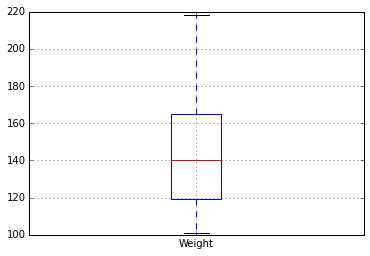

In [62]:
%matplotlib inline
data.boxplot('Weight', return_type='axes')
plt.show()

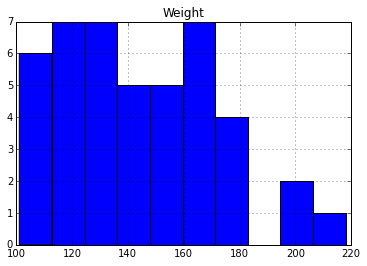

In [63]:
data.hist('Weight')
plt.show()

There does not appear to be any mistaken entries for the weight data.

### Question 2

In [64]:
data['Gender'] = data['Gender'].astype('category')

In [65]:
data.Gender.describe()

count     44
unique     3
top        F
freq      25
Name: Gender, dtype: object

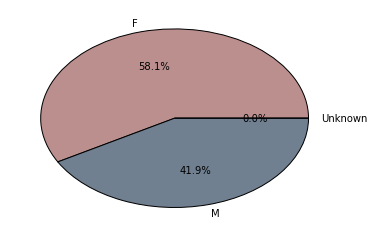

In [66]:
data.Gender[0] = np.nan
counts = data.Gender.value_counts()
c = ['rosybrown','slategray','darkseagreen']
plt.pie(counts, labels=['F','M', 'Unknown'], autopct='%1.1f%%', colors=c)
plt.show()

Only one bad value for Gender: the first row of the data has an * presumably denoting unknown or unreported Gender.

### Question 3

The two-sample t-test can be used to compare the weight of females, $\mu_f$ vs that of males, $\mu_m$. 

$H_0: \mu_f - \mu_m \le 0$ <br>
$H_a: \mu_f - \mu_m > 0$ <br>
$\alpha = .01$

In [67]:
#Count # of categories
females = len(data.Gender[data.Gender == 'F'])
males = len(data.Gender[data.Gender == 'M'])
(females, males)

(25, 18)

Since both $n_1$ and $n_2$ are less than 30, we need to check normality assumptions.

[Insert prob_plot image]

Next, we need to decide whether to use pooled variance or separate variance. Since the size of each group is different and the standard deviations are off by about 6 lbs, we will use the non-pooled t-test.

[Insert image of 2 sample t-test]

Since the p-value > $\alpha = .01$, we cannot reject the null hypothesis. We conclude that the mean weight of males is greater than or equal to that of females.

### Question 4

The paired t-test can be used to compare the difference between the current weight and the ideal weight for each participant in the survey. 

I believe that most people wish to lose weight, therefore I establish my hypotheses:

$H_0: \mu_d = \mu_{current} - \mu_{ideal} \le 0$ <br>
$H_a: \mu_d = \mu_{current} - \mu_{ideal} > 0$ <br>
$\alpha = .015$ <br>
degrees of freedom = 43 - 1 = 42

In [72]:
# compute mean difference
(data.Weight - data["Ideal-weight"]).mean()

7.930232558139535

In [75]:
# compute std dev
(data.Weight - data["Ideal-weight"]).std(ddof=1)

12.821847702888126

[Insert paired data image]

p-value = 0.0000 < 0.015, so we can reject $H_0$ and conclude that people's ideal weight is less than their current weight.

### Question 5

The data for this question is paired and is calling for a one-tailed test. We already calculated the standard deviation in the previous question, 12.8218. 

[Insert image for weight loss power]

Based on the power curve, we would need to sample 1018 students.

### Question 6

For the two qualitative variables, I chose gender and favorite sport. I wanted to test if there was dependence between these two variables. Since Hockey did not have any respondents, I excluded it from the table since it didn't have any effect on the test.

|        | Football | Basketball | Other | Total |
|--------|----------|------------|-------|-------|
| Male   | 5        | 4          | 9     | 18    |
| Female | 5        | 6          | 14    | 25    |
| Total  | 10       | 10         | 23    | 43    |

[Insert chi square results]

The results of the Chi-square test indicate that we cannot reject the null hypothesis that the values are independent. However, since there are 2 cells (33.3%) with expected count < 5, we cannot trust the result.